In [135]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [136]:
# read the dataset
pf=pd.read_csv("Zomato data .csv")

Data Pre-Processing

In [137]:
pf.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [138]:
pf.tail()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining
147,Vijayalakshmi,Yes,No,3.9/5,47,200,Dining


In [139]:
pf["rate"] = pf["rate"].str.replace("/5","").astype(float)

In [140]:
pf.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [141]:
pf.shape

(148, 7)

In [142]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [143]:
pf.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


In [144]:
pf.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [145]:
pf.duplicated().sum()

0

After doing pre-processing let solve given problems

Ques 1) What  Type of Restaurant do the majority of customer order from ?

In [146]:
pf.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


C:\Users\22shi\AppData\Local\Temp\ipykernel_8772\3409230153.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="listed_in(type)",data=pf,palette=cr)


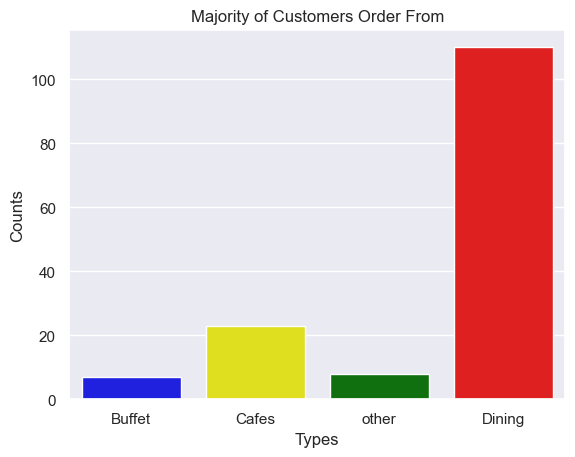

In [147]:
sns.set(style="darkgrid")
cr=["blue","yellow","green","red"]
sns.countplot(x="listed_in(type)",data=pf,palette=cr)
plt.title("Majority of Customers Order From")
plt.xlabel("Types")
plt.ylabel("Counts")
plt.show()

Ques 2) How many votes has each type of restaurant received from customers ?

In [148]:
pf.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


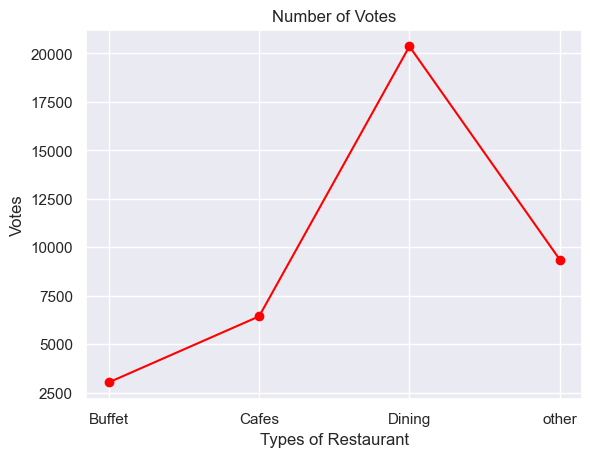

In [149]:
sns.set(style="darkgrid")
gruped_by=pf.groupby("listed_in(type)")["votes"].sum()
plt.plot(gruped_by,marker="o",c="red")
plt.title("Number of Votes")
plt.xlabel("Types of Restaurant")
plt.ylabel("Votes")
plt.show()

QUES 3) What are the ratings that the majority of resaurant have received ?

In [150]:
pf.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


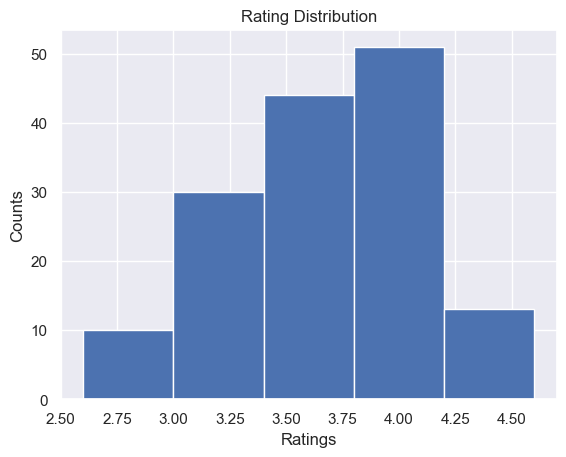

In [151]:
plt.hist(pf["rate"],bins=5)
plt.title("Rating Distribution")
plt.xlabel("Ratings")
plt.ylabel("Counts")
plt.show()

Ques 4) Zomato has observed that most couples order most of their food onlines what is their avg spending on each order

In [152]:
pf.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


C:\Users\22shi\AppData\Local\Temp\ipykernel_8772\3311640443.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pf["approx_cost(for two people)"],palette="plasma")


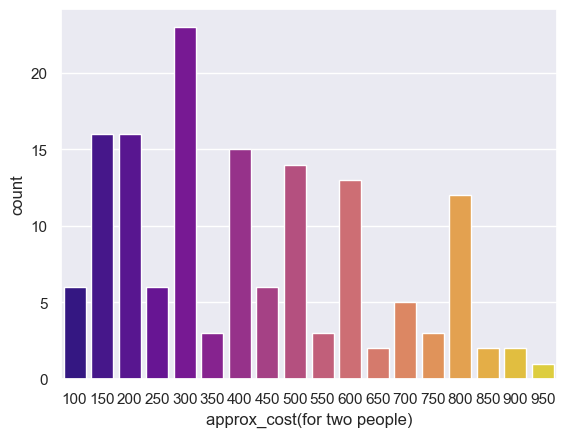

In [153]:
sns.countplot(x=pf["approx_cost(for two people)"],palette="plasma")
plt.show()

Ques 5 ) Which mode (online or offline) has received the maximum rating

In [154]:
pf.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


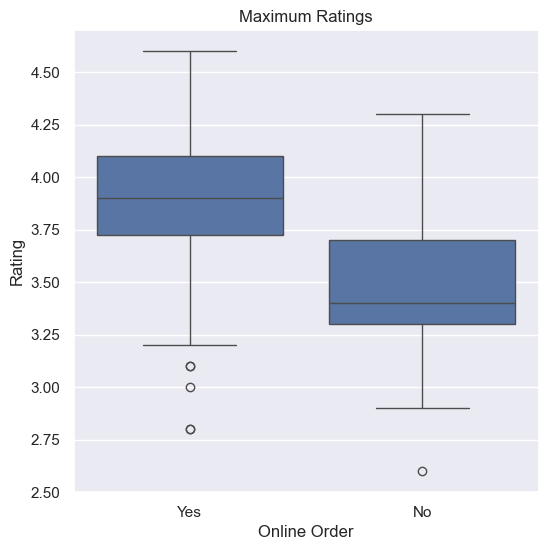

In [155]:
plt.figure(figsize=(6,6))
sns.boxplot(x="online_order",y="rate",data=pf)
plt.xlabel("Online Order")
plt.ylabel("Rating")
plt.title("Maximum Ratings")
plt.show()

Ques 6 ) Which type of restaurant recived more offline orders , so that zomato can process customer with same good offers

In [156]:
pf.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


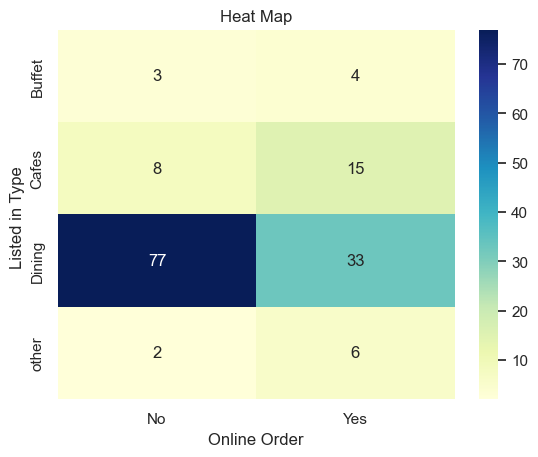

In [157]:
pivot_table=pf.pivot_table(index="listed_in(type)",columns="online_order",aggfunc="size",fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt="d")
plt.title("Heat Map")
plt.xlabel("Online Order")
plt.ylabel("Listed in Type ")
plt.show()

Ques 1) What  Type of Restaurant do the majority of customer order from ? 
Ans- Dinning
Ques 2) How many votes has each type of restaurant received from customers ?
Ans- Dinning Highest
QUES 3) What are the ratings that the majority of resaurant have received ?
Ans- 4.0
Ques 4) Zomato has observed that most couples order most of their food onlines what is their avg spending on each order
Ans- 300
Ques 5 ) Which mode (online or offline) has received the maximum rating
Ans-Online
Ques 6 ) Which type of restaurant recived more offline orders , so that zomato can process customer with same good offers
Ans-Dinning